# Sortie Animation profil vitesse 

Exporter les profil verticaux des vitesses 


### Outline of the script
1. 
2. 
3. 

| Designation  | $T_{ini}$s | $T_{end}$s | $\Delta T$ °C | $f$ | _Comment_ |_Temporal resolution PIV_ |
|--------------|------------|------------|---------------|-----|-----------|-----------|
| **EXP01**    | 0          | 120        | 0             | 0   | Fail in camera acquisition ||
| **EXP02**    | 0          | 120        | 0             | 0   |           | |
| **EXP03**    | 120        | 60         | 0             | 0.104 |       | |
| **EXP04**    | 100        | 54.5       | 0             | 0.125 |  |Frequence btwn burts 1/s     |
| **EXP05**    | 80         | 48         | 0             | 0.157 | Fail in camera acquisition | Frequence btwn burts 4/s |
| **EXP06**    | 80         | 48         | 0             | 0.157 |    | Frequence btwn burts 4/s |
| **EXP07**    | 0          | 120        | 0             | 0   |           |Frequence btwn burts 5/s|
| **EXP08**    | 0          | 120        | 9°C           | 0   | optical refraction / mixing | Frequence btwn burts 5/s|
| **EXP09**    | 120        | 60         | 0             | 0.104 |       |Frequence btwn burts 5/s|
| **EXP10**    | 120        | 60         | 12°C          | 0.104 | optical refraction / mixing |Frequence btwn burts 5/s|
| **EXP11**    | 98         | 541        | 12°C          | 0.128 | Spin down |Frequence btwn burts 5/s|
| **EXP12**    | 0          | 120        | 19°C          | 0   | Test Stereo x Stratif |Frequence btwn burts 5/s|
| **EXP13**    | 0          | 120        | 0             | 0   | Stereo    |Frequence btwn burts 5/s|
| **EXP14**    | 0          | 120        | 0             | 0   | Stereo    |Frequence btwn burts 5/s|
| **EXP15**    | 0          | 120        | 0             | 0   | Stereo + Colorant |Frequence btwn burts 5/s|
| **EXP16**    | 120        | 60         | 20°C          | 0.104 | Stereo + Colorant |Frequence btwn burts 5/s|
| **EXP17**    | 100        | 54.5       | 5°C           | 0.125 | Stereo + Colorant / Not enough particles to PIV |Frequence btwn burts 5/s|


The sliding averages is done one a 3 second period to decompose the component due to the mean flow $\overline{u}$ and the turbulent fluctuating part $u'$

In [4]:
# Import all the library: 
 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy.io
from netCDF4 import Dataset
import cmocean

In [5]:
# Importation of the function that manage the extraction of all the data from the `load_data.py' 

import load_data as data      # the py script `load_data.py' must be in the same folder than this notebook


In [6]:
# Accéder aux variables spécifiques

# list of each experiment for the different insrtuments=
nexp_adv =['02','03','04','05','06','07','08','09','10','11','13','14','15','16','17']
nexp_stereo =['12','13','14','15','16']
nexp_labview = ['05','06','07','08','09','10','12','13','14','15','16','17']
nexp_jai = ['04','06','07','08','09','10']

# Créer un dictionnaire pour stocker les variables de chaque expérience
time_stereo = {}
time_adv    = {}
time_jai    = {}
time_T      = {}

Coord_y_stereo = data.get_variable(str('EXP12'), 'STEREO', 'coord_y')
Coord_x_stereo = data.get_variable(str('EXP12'), 'STEREO', 'coord_x')
dy_stereo      = np.array(Coord_y_stereo[1]-Coord_y_stereo[0])
dx_stereo      = np.array(Coord_x_stereo[1]-Coord_x_stereo[0])

Coord_y_jai    = data.get_variable(str('EXP10'), 'JAI', 'coord_y')
dy_jai         = np.array(Coord_y_jai[1]-Coord_y_jai[0])

#Data Stereo
U_stereo    = {}; W_stereo    = {}; V_stereo    = {}; uprime_stereo = {}; wprime_stereo = {}; vprime_stereo = {};
ubar_stereo = {}; wbar_stereo = {}; vbar_stereo = {};
uu_stereo   = {};  ww_stereo  = {}; uw_stereo   = {}; vw_stereo     = {}; vv_stereo = {}; 

#Data JAI
U_jai       = {}; W_jai       = {}; uprime_jai  = {}; wprime_jai    = {}; ubar_jai    = {}; wbar_jai    = {};
uu_jai  = {};  ww_jai  = {};  uw_jai  = {}

#DATA ADV
U_adv       = {}; V_adv       = {};




# Définir les variables de temps pour chaques expériences
for exp in nexp_adv :
    time_adv[str('EXP'+exp)]  = data.get_variable(str('EXP'+exp), 'ADV', 'time')
    U_adv[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'ADV', 'u') 
    V_adv[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'ADV', 'v')
    
for exp in nexp_jai :
    time_jai[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'JAI', 'Time')
    U_jai[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'JAI', 'U') 
    W_jai[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'JAI', 'W')
    uprime_jai[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'JAI', 'Uprime') 
    wprime_jai[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'JAI', 'Wprime')
    ubar_jai[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'JAI', 'Ubar') 
    wbar_jai[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'JAI', 'Wbar')
    uu_jai[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'JAI', 'uu') 
    uw_jai[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'JAI', 'uw')
    ww_jai[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'JAI', 'ww')
    
for exp in nexp_stereo :
    time_stereo[str('EXP'+exp)]    = data.get_variable(str('EXP'+exp), 'STEREO', 'Time')
    U_stereo[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'STEREO', 'U') 
    W_stereo[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'STEREO', 'W')
    V_stereo[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'STEREO', 'V')
    uprime_stereo[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'STEREO', 'Uprime') 
    wprime_stereo[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'STEREO', 'Wprime')
    vprime_stereo[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'STEREO', 'Vprime')
    ubar_stereo[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'STEREO', 'Ubar')
    vbar_stereo[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'STEREO', 'Vbar')
    wbar_stereo[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'STEREO', 'Wbar')
    uu_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'uu') 
    uw_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'uw')
    ww_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'ww')
    vw_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'vw')
    vv_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'vv')


In [7]:
from animation_utils import create_animation
from animation_utils import create_animation_dual

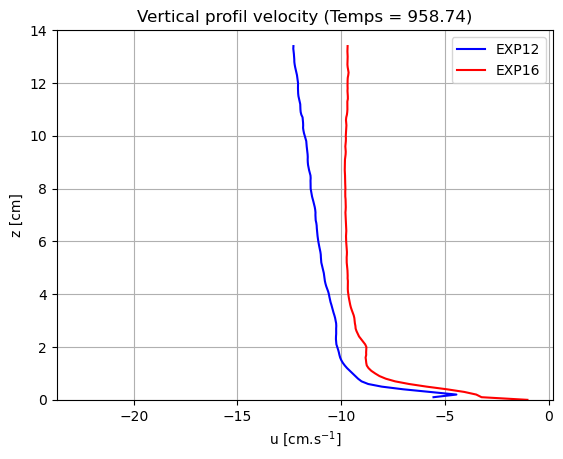

In [10]:
create_animation_dual(time_stereo['EXP12'], ubar_stereo['EXP12'],ubar_stereo['EXP16'], Coord_y_stereo, 'Vertical profil velocity' , 'u [cm.s$^{-1}$]', 'z [cm]', 'EXP12', 'EXP16')

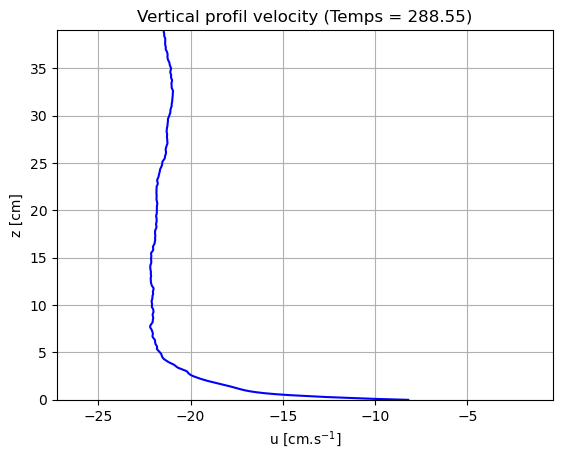

In [9]:
create_animation(time_jai['EXP07'], ubar_jai['EXP07'], Coord_y_jai,'Vertical profil velocity' ,'u [cm.s$^{-1}$]', 'z [cm]', output_file='animation.gif')